<a href="https://colab.research.google.com/github/hyeji-K/AI_example/blob/main/%EB%B6%84%EB%A5%98%ED%95%98%EB%8A%94_%EB%89%B4%EB%9F%B0%EC%9D%84_%EB%A7%8C%EB%93%AD%EB%8B%88%EB%8B%A4(%EC%9D%B4%EC%A7%84_%EB%B6%84%EB%A5%98).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 로지스틱 회귀와 시그모이드 함수 소개
### 초기 인공지능 알고리즘과 로지스틱 회귀
- 이진 분류는 True(1) / False(0 or -1)로 구분하는 문제
    - 양성 클래스 / 음성 클래스
- 퍼셉트론(Perceptron): 1957년 프랑크 로젠블라트가 발표
    - 신경망 = 다층 퍼셉트론
- 특성 2개 사용
- w1x1 + w2x2 + b = z

#### 아달린(Adaline)
- 1960년 버나드 위드로우 & 테드 호프 적응형 선형 뉴런(Adaptive Linear Neuron)
- 역방향 계산이 일어나는 위치가 퍼셉트론과 다름

#### 로지스틱 회귀
- 분류 알고리즘
- 활성화 함수(시그모이드 함수)를 사용하여 z 값을 a 값으로 변환
- 왜 비선형 함수를 사용할까요?
- 시그모이드 함수로 확률을 만듭니다
- 오즈 비(odds ratio) -> 로짓 함수(logit function) -> 시그모이드 함수

활성화 함수를 통과하면 0 ~ 1 사이의 값으로 압축되고 이를 a > 0.5이면 1, a <= 0.5이면 0 인 임계함수를 통과시킴


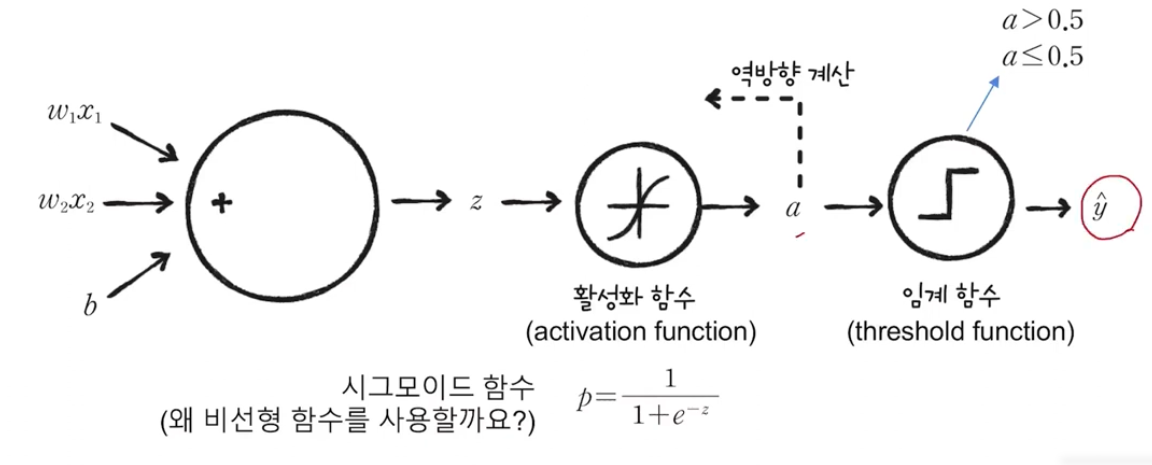

### 로지스틱 손실 함수를 경사 하강법에 적용
- 분류의 정확도는 미분 가능한 함수가 아닙니다
- 정확도는 정확히 분류된 비율
- 정확도는 분류 문제의 목표
- 회귀 문제의 목표는 제곱 오차는 낮추는 것
- 대신 이진 크로스 엔트로피(binary cross entropy) 또는 **로지스틱(logistic) 손실 함수**를 사용
```
L = - (ylog(a) + (1-y)log(1-a))
```
- y는 타깃값, a는 활성화 함수의 출력
- y가 1인 경우(양성 클래스), -log(a), a는 1에 가까워야하고
- y가 0인 경우(음성 클래스), -log(1-a), a는 0에 가까워야 함

#### 로지스틱 손실 함수 미분하기
- 제곱 오차의 미분과 비슷하게 미분됨

#### 미분의 연쇄 법칙(Chain Rule)
- 합성 함수의 도함수를 구하는 방법


### 로지스틱 회귀를 위한 뉴런 만들기

1. 분류용 데이터 세트를 준비합니다
- 찾고자 하는 것을 레이블 1로 둠

In [1]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.data.shape, cancer.target.shape)

(569, 30) (569,)


In [2]:
cancer.data[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

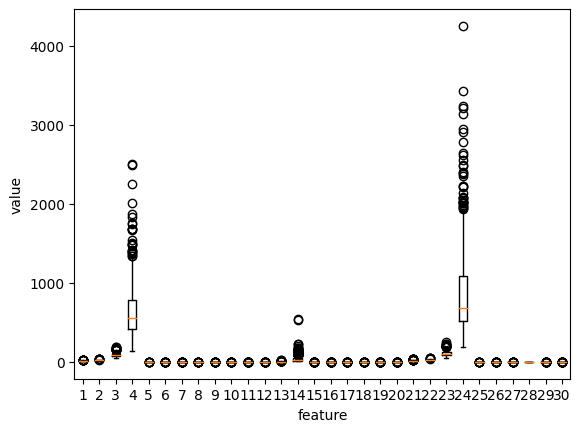

In [3]:
# 박스 플롯(상자 수염 그래프) 그려서 데이터 파악하기
import matplotlib.pyplot as plt
plt.boxplot(cancer.data)
plt.xlabel('feature') # 특성
plt.ylabel('value')
plt.show()

In [5]:
# 타킷 데이터 확인하고 훈련 데이터 준비하기
import numpy as np
np.unique(cancer.target, return_counts=True)
# 음성 클래스 212개, 양성 클래스 357개 -> 불균형한 데이터

(array([0, 1]), array([212, 357]))

In [6]:
x = cancer.data
y = cancer.target

In [27]:
# 로지스틱 회귀를 위한 뉴런을 만듭니다
# 일반화 성능을 평가하기 위해 훈련 세트와 테스트 세트로 나눕니다
# 모델 훈련 - 모델 평가
# 훈련 데이터 세트를 훈련 세트와 테스트 세트로 나누는 규칙
# - 훈련 데이터 세트를 나눌 때는 테스트 세트보다 훈련 세트가 더 많아야 합니다.
# - 훈련 데이서 세트를 나누기 전에 양성, 음성 클래스가 훈련 세트나 테스트 세트의 어느 한쪽에 몰리지 않도록 골고루 섞어야 합니다

# 훈련 세트와 테스트 세트 나누기
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)
# 비율은 4:1 정도로 나눔
# stratify 양성 클래스와 음성 클래스의 비율을 동일하게 유지하는 옵션
# 테스트 세트는 20% 정도
print(x_train.shape, x_test.shape)
np.unique(y_train, return_counts=True)
# np.unique(y_test, return_counts=True)

(455, 30) (114, 30)


(array([0, 1]), array([170, 285]))

In [13]:
# 로지스틱 뉴런 구현하기
class LogisticNeuron:

    # 가중치와 절편을 미리 초기화 하지 않습니다
    def __init__(self):
        self.w = None
        self.b = None

    # 정방향 계산 만들기
    def forpass(self, x):
        z = np.sum(x * self.w) + self.b
        return z

    # 역방향 계산 만들기
    def backprop(self, x, err):
        w_grad = x * err # 가중치에 대한 그레이디언트 계산
        b_grad = 1 * err # 절편에 대한 그레이디언트 계산
        return w_grad, b_grad

    # 훈련을 위한 fit() 메서드 구현
    def fit(self, x, y, epochs=100):
        self.w = np.ones(x.shape[1]) # 가중치를 초기화
        self.b = 0 # 절편을 초기화
        for i in range(epochs): # 에포크만큼 반복
            for x_i, y_i in zip(x, y): # 모든 샘플에 대해 반복
                z = self.forpass(x_i) # 정방향 계산
                a = self.activation(z) # 활성화 함수 적용
                err = -(y_i - a) # 오차 계산
                w_grad, b_grad = self.backprop(x_i, err) # 역방향 계산
                self.w -= w_grad # 가중치 업데이트
                self.b -= b_grad # 절편 업데이트

    def activation(self, z):
        a = 1 / (1 + np.exp(-z)) # 시그모이드 계산
        return a

    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x] # 선형 함수 적용
        a = self.activation(np.array(z)) # 활성화 함수 적용
        return a > 0.5 # 계단 함수 적용

In [14]:
# 모델 훈련하고 결과 확인하기
neuron = LogisticNeuron()
neuron.fit(x_train, y_train)
np.mean(neuron.predict(x_test) == y_test) # true == 1, false == 0

<ipython-input-13-495efa58ae53>:34: RuntimeWarning: overflow encountered in exp
  a = 1 / (1 + np.exp(-z)) # 시그모이드 계산


0.8245614035087719

### 로지스틱 회귀 뉴런으로 단일층 신경망을 만듭니다

In [19]:
# 손실 함수 결괏값 저장 기능 추가하기
class SingleLayer:

    # 가중치와 절편을 미리 초기화 하지 않습니다
    def __init__(self):
        self.w = None
        self.b = None
        self.losses = []

    # 정방향 계산 만들기
    def forpass(self, x):
        z = np.sum(x * self.w) + self.b
        return z

    # 역방향 계산 만들기
    def backprop(self, x, err):
        w_grad = x * err # 가중치에 대한 그레이디언트 계산
        b_grad = 1 * err # 절편에 대한 그레이디언트 계산
        return w_grad, b_grad

    # 훈련을 위한 fit() 메서드 구현
    # 무작위로 섞기 위해 에포크마다 훈련 샘플 섞기
    def fit(self, x, y, epochs=100):
        self.w = np.ones(x.shape[1]) # 가중치를 초기화
        self.b = 0 # 절편을 초기화
        for i in range(epochs): # 에포크만큼 반복
            loss = 0
            indexes = np.random.permutation(np.arange(len(x))) # 인덱스를 섞습니다
            for i in indexes: # 모든 샘플에 대해 반복
                z = self.forpass(x[i]) # 정방향 계산
                a = self.activation(z) # 활성화 함수 적용
                err = -(y[i] - a) # 오차 계산
                w_grad, b_grad = self.backprop(x[i], err) # 역방향 계산
                self.w -= w_grad # 가중치 업데이트
                self.b -= b_grad # 절편 업데이트
                a = np.clip(a, 1e-10, 1-1e-10) # 안전한 로그 계산을 위해 클리핑한 후 손실을 누적합니다
                loss += -(y[i] * np.log(a) + (1-y[i]) * np.log(1-a)) # 애포크마다 평균 손실을 저장
            self.losses.append(loss/len(y))

    def activation(self, z):
        a = 1 / (1 + np.exp(-z)) # 시그모이드 계산
        return a

    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x] # 정방향 계산
        return np.array(z) > 0 # 계단 함수 적용

    def score(self, x, y):
        return np.mean(self.predict(x) == y)

### 여러가지 경사 하강법
- 확률적 경사 하강법
    - 1개의 샘플을 중복되지 않도록 무작위로 선택
- 배치 경사 하강법
    - 전체 샘플들 모두 선택
- 미니 배치 경사 하강법
    - 전체 샘플 중 몇 개의 샘플을 중복되지 않도록 무작위로 선택

In [21]:
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

<ipython-input-19-d73b8250ede8>:43: RuntimeWarning: overflow encountered in exp
  a = 1 / (1 + np.exp(-z)) # 시그모이드 계산


0.868421052631579

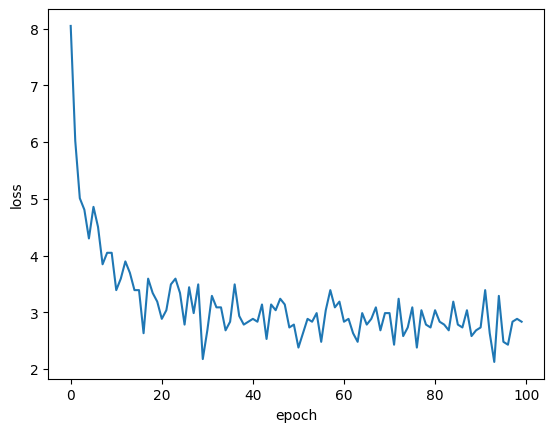

In [22]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 사이킷런으로 로지스틱 회귀를 수행합니다

In [24]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log_loss', max_iter=100, tol=1e-3, random_state=42)
sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)

0.8333333333333334

In [25]:
sgd.predict(x_test[0:10])

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])